## Programming for Data Analysis Project



** Introduction**

The weather, the obsession of all Irish adults. From a conversation starter to the dreaded threat of weddings and summer bar-be-cues.

Meteireann has the dubious task of trying to give accurate and timely forecasts for the nation, while more often than not being the butt of the joke due to each individual taking a wholistic forecast as a personal gaurantee of weather certainty.

The following project is going to analyse the percipitation (Rain Fall) from the Cork Airport weather station in County Cork under the following headings;

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


** Aim**

The aim of this project is to explore the creation of an accurate localised weather predictor by investigating if known historical weather characterisitics have a dependency and relationship with each other.


** Method **

By analysing historical weather data and its associated characteristics in relation to percipitation amount it is proposed that if the correct weather characteristics and data for the local area are entered into the model i.e. Ballincollig, County Cork, an accurate determination if percipition (rain) is forecast for your locality will be determined.

As the Cork Airport weather station is the closest weather station with enough variable data to create a model it was used to gather historical data points.

For the purpose of this project random data will be generated using numpy.random to generate a data sets to mimick the characteristics of the variables taken from the Cork Airport weather station. i.e.

- Date
- Percipitation Amount (mm)
- Maximum Air Temperature (C)
- Minimum Air Temperature (C)
- Mean Wind Speed (Knot)
- Wind Direction at Max 10 min Mean (deg)
- Mean CBL Pressure (hpa)


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from scipy.stats import kurtosis, skew

**Definition of the Data Frame**

To provide clarity when further analysis is conducted and to be able to differentiate between the original and random data sets we will define the original Cork airport data frame as "CorkAirportData"

In [62]:
CorkAirportData = df
df = pd.read_csv('C://Users//Shane//Desktop//GMIT//meteireann//CorkAirportDataone.txt')

In [63]:
CorkAirportData

Date  MaxTemp  MinTemp  Rain (mm)  Pressure cbl (Hpa)  \
0    31-Oct-17     12.3     10.0        0.0              1003.7   
1    01-Nov-17     12.6      7.8        0.0               998.5   
2    02-Nov-17     12.8      7.8        0.2               997.4   
3    03-Nov-17     10.0      7.3        0.0               992.5   
4    04-Nov-17      9.4      3.4        2.4               991.3   
5    05-Nov-17      9.8      4.0        1.1              1000.5   
6    06-Nov-17     11.5      5.6       10.6               997.8   
7    07-Nov-17      9.7      3.0        2.5               997.2   
8    08-Nov-17     10.5      4.0        0.1              1005.2   
9    09-Nov-17     12.2      8.7        0.8              1006.8   
10   10-Nov-17     12.1      9.2        0.7              1002.6   
11   11-Nov-17     14.1      7.3        4.3               995.2   
12   12-Nov-17      8.6      2.6        0.0              1002.6   
13   13-Nov-17     10.2      2.6        0.0              1007.2   
14   14-Nov-17     13.1      9.6        0.3              1003.2   
15   15-Nov-17     11.1      8.6        2.3              1002.3   
16   16-Nov-17     10.6      4.3        0.2              1005.5   
17   17-Nov-17      8.4      3.1        0.3              1009.3   
18   18-Nov-17     13.4      7.9        1.6              1005.2   
19   19-Nov-17     11.0      7.1        2.0              1000.7   
20   20-Nov-17     13.4     11.0        1.7               994.5   
21   21-Nov-17     13.1     10.6       14.4               985.5   
22   22-Nov-17     12.9      3.0       21.6               970.5   
23   23-Nov-17      9.0      1.9        0.1               977.8   
24   24-Nov-17      6.4      0.9        2.1               993.0   
25   25-Nov-17      5.0      0.6        0.6              1003.2   
26   26-Nov-17      9.7      2.3        0.7              1004.3   
27   27-Nov-17     10.2      4.3        4.0               998.0   
28   28-Nov-17      6.1      1.8        0.1               997.8   
29   29-Nov-17      5.2      0.8        0.0              1001.2   
..         ...      ...      ...        ...                 ...   
336  02-Oct-18     18.1     11.4        0.0              1006.9   
337  03-Oct-18     15.5     10.4        0.2              1007.7   
338  04-Oct-18     14.9     11.4        2.8              1001.5   
339  05-Oct-18     11.4      6.6        0.4               996.6   
340  06-Oct-18     11.9      5.0        0.0              1000.8   
341  07-Oct-18     13.4      3.1        0.0              1002.3   
342  08-Oct-18     13.9     11.6        0.3               996.2   
343  09-Oct-18     15.2     12.0        0.0               992.2   
344  10-Oct-18     16.9     12.2        0.0               983.2   
345  11-Oct-18     14.1     10.1        9.7               972.3   
346  12-Oct-18     13.9     10.4       18.3               972.8   
347  13-Oct-18     13.2      7.8       18.4               982.3   
348  14-Oct-18     12.3      5.6        0.0               990.5   
349  15-Oct-18     13.3      5.2        0.0               994.0   
350  16-Oct-18     15.5      7.0        1.4               993.5   
351  17-Oct-18     13.1      5.8        0.4              1002.6   
352  18-Oct-18     12.5      4.6        0.1              1007.9   
353  19-Oct-18     13.8      8.1        0.0              1006.4   
354  20-Oct-18     13.5     10.1        0.2              1009.5   
355  21-Oct-18     13.2      5.8        0.6              1013.2   
356  22-Oct-18     12.6      4.5        0.0              1020.9   
357  23-Oct-18     15.3      6.5        0.0              1018.3   
358  24-Oct-18     12.9      7.3        0.0              1013.0   
359  25-Oct-18     13.1      8.3        0.0              1005.5   
360  26-Oct-18      9.2      4.0        0.3              1002.3   
361  27-Oct-18      6.9      1.2        0.1              1004.9   
362  28-Oct-18      8.7      0.3        0.0              1003.1   
363  29-Oct-18      8.4      2.6        2.0              

** Summary Descriptive Statistics for the Data Frame**

To generate random data to match the characteristics of the cork airport weather data I first need to determine the descriptive statistics for the data set. To generate a randm data set that closely aligns to the cork airport data set I am going to calculate the following statistical parameters.

- Mean
- Standard Deviation (std)
- Skewness
- Kurtosis

In [65]:
print ("Cork Airport Data Mean Results")
CorkAirportData.mean()

Cork Airport Data Mean Results


MaxTemp                  13.301366
MinTemp                   6.671858
Rain (mm)                 2.960929
Pressure cbl (Hpa)      995.120765
WindSpeed (Knots)         9.370219
Wind Direction (deg)    228.415301
dtype: float64

In [66]:
print ("Cork Airport Data Standard Deviation Results")
CorkAirportData.std()

Cork Airport Data Standard Deviation Results


MaxTemp                  5.517347
MinTemp                  4.669434
Rain (mm)                5.256508
Pressure cbl (Hpa)      11.382705
WindSpeed (Knots)        3.611673
Wind Direction (deg)    89.321351
dtype: float64

In [67]:
print ("Cork Airport Data Skewness Results")
CorkAirportData.skew()

Cork Airport Data Skewness Results


MaxTemp                 0.175570
MinTemp                -0.028819
Rain (mm)               2.597616
Pressure cbl (Hpa)     -0.594056
WindSpeed (Knots)       0.694846
Wind Direction (deg)   -0.609418
dtype: float64

In [68]:
print ("Cork Airport Data Kurtosis Results")
CorkAirportData.kurtosis()

Cork Airport Data Kurtosis Results


MaxTemp                -0.538643
MinTemp                -0.809285
Rain (mm)               7.324231
Pressure cbl (Hpa)      0.033814
WindSpeed (Knots)       0.133744
Wind Direction (deg)   -0.338251
dtype: float64

In [69]:
print ("Cork Airport Data Min Results")
CorkAirportData.min()

Cork Airport Data Min Results


Date                    01-Apr-18
MaxTemp                      -1.8
MinTemp                        -7
Rain (mm)                       0
Pressure cbl (Hpa)          963.3
WindSpeed (Knots)             2.8
Wind Direction (deg)            0
dtype: object

In [70]:
print ("Cork Airport Data Max Results")
CorkAirportData.max()

Cork Airport Data Max Results


Date                    31-Oct-18
MaxTemp                      26.7
MinTemp                      16.5
Rain (mm)                      31
Pressure cbl (Hpa)         1020.9
WindSpeed (Knots)            23.8
Wind Direction (deg)          360
dtype: object

In [71]:
print ("Cork Airport Data Median Results")
CorkAirportData.median()

Cork Airport Data Median Results


MaxTemp                  12.60
MinTemp                   6.75
Rain (mm)                 0.40
Pressure cbl (Hpa)      996.85
WindSpeed (Knots)         8.90
Wind Direction (deg)    230.00
dtype: float64

** Defining Each Column Within the Cork Airport Data Frame**

To compare the data and graphs of the Cork airport data and the randomly generated data I will define each column within the data frame so it can be graphed. I will use the iloc function to define each column of data so they can be plotted on as subplots on bar chart graphs.

In [72]:
plt.subplot(2,3,1)
MaxTemp=CorkAirportData.iloc[0:365,1]
plt.hist(MaxTemp)
plt.title("MaxTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [73]:
plt.subplot(2,3,2)
MinTemp=CorkAirportData.iloc[0:365,2]
plt.hist(MinTemp)
plt.title("MinTemp")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

In [74]:
plt.subplot(2,3,3)
Rain=CorkAirportData.iloc[0:365,3]
plt.hist(Rain)
plt.title("Percipitation (mm)")
plt.xlabel("Qty")
plt.ylabel("Volume")

Text(0,0.5,'Volume')

In [75]:
plt.subplot(2,3,4)
Pressure=CorkAirportData.iloc[0:365,4]
plt.hist(Pressure)
plt.title("Pressure (Hpa)")
plt.xlabel("Qty")
plt.ylabel("Pressure")

Text(0,0.5,'Pressure')

In [76]:
plt.subplot(2,3,5)
WindSpeed=CorkAirportData.iloc[0:365,5]
plt.hist(WindSpeed)
plt.title("Wind Speed (knots)")
plt.xlabel("Qty")
plt.ylabel("Speed Knots")

Text(0,0.5,'Speed Knots')

In [77]:
plt.subplot(2,3,6)
WindDirection=CorkAirportData.iloc[0:365,6]
plt.hist(WindDirection)
plt.title("Wind Direction (deg)")
plt.xlabel("Qty")
plt.ylabel("Wind Direction (deg)")

Text(0,0.5,'Wind Direction (deg)')

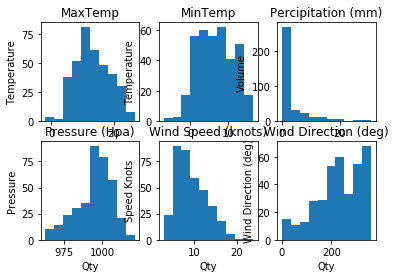

In [78]:
plt.show()

** Generatation of Random Data to Simulation the Cork Airport Weather Data**

To analyse the data and to determine if there is any dependancies between the variables and rainfall, random data will be generated who's distributions approximate the real world weather data from Cork Airport. Below we detail the distributions assigned to each of the weather variables selected and a brief justification for selecting the specific distribution for each variable.
    
       Weather Variable         Designation        Selected Distribution
     - Max Temperature          RandMaxTemp        Normal Distribution
     - Min Temperature          RandMinTemp        Normal Distribution
     - Percipitation            RandRain           Gamma Distribution
     - Pressure                 RandPressure       Gumbel Distribution
     - Wind Speed               RandWindSpeed      Gumbel Distribution
     - Wind Direction           RandWindDir        Gumbel Distribtion
     
As the original data visually illustrated the Max and Min temperatures displayed an approximation to the normal distribution the random data for Max and Min temperatures will be generated following the normal distribution.

On review of literature it was discovered a number of distributions can be used to model percipitation amounts. As the original data set was right skewed the Gamma distribution was selected to model the random data for percipitation (Rain Fall)

All other variables display extreme values and for this reason the Gumbel distributions were selected for them.
     

**RandMaxTemp**

In [22]:
RandMaxTemp=np.random.normal(13.301366,5.517347,365)
plt.subplot(2,3,1)
plt.hist(RandMaxTemp)
plt.title("Daily Max Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandMinTemp**

In [23]:
RandMinTemp=np.random.normal(6.671858,4.669434,365)
plt.subplot(2,3,2)
plt.hist(RandMinTemp)
plt.title("Daily Min Temperature")
plt.xlabel("Qty")
plt.ylabel("Temperature")

Text(0,0.5,'Temperature')

**RandRain**

In [24]:
RandRain = np.random.gamma(0.4, 5.256508, 365)
plt.subplot(2,3,3)
plt.hist(RandRain)
plt.title("Daily Rain Fall")
plt.xlabel("Amount")
plt.ylabel("Rain mm")

Text(0,0.5,'Rain mm')

**RandPressure**

In [25]:
RandPressure = np.random.gumbel(996.85, 11.382705, 365)
plt.subplot(2,3,4)
plt.hist(RandPressure)
plt.title("Daily Pressure")
plt.xlabel("Pressure")
plt.ylabel("Pressure Frequency Hpa")

Text(0,0.5,'Pressure Frequency Hpa')

**RandWindSpeed**

In [26]:
RandWindSpeed = np.random.gumbel(8.9, 3.611673, 365)
plt.subplot(2,3,5)
plt.hist(RandWindSpeed)
plt.title("Daily Wind Speed")
plt.xlabel("Wind Speed")
plt.ylabel("Wind Speed Frequency Knots")

Text(0,0.5,'Wind Speed Frequency Knots')

**RandWindDir**

In [27]:
RandWindDir = np.random.gumbel(230, 89.321351, 365)
plt.subplot(2,3,6)
plt.hist(RandWindDir)
plt.title("Daily Wind Direction")
plt.xlabel("Wind Direction")
plt.ylabel("Wind Direction Degs")

Text(0,0.5,'Wind Direction Degs')

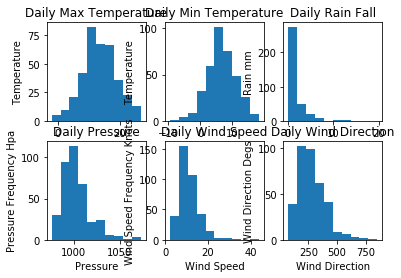

In [28]:
plt.show()

**Random Data, Data Frame Creation**

Now that we have created random data to simulate the real world weather data from Cork airport, we will create a data from to store our results.

I will define and name the data frame RanWeatherData to differenciate from the original data set from Cork airport.

In [58]:
RanWeatherData = df
df = pd.DataFrame({"Random Max Temp":RandMaxTemp, "Random Min Temp": RandMinTemp, "Random Rain": RandRain, "Random Pressure": RandPressure, "Random Wind Speed": RandWindSpeed, "Random Wind Direction": RandWindDir})

In [59]:
RanWeatherData

Random Max Temp  Random Min Temp  Random Pressure  Random Rain  \
0          11.242500         4.313459      1000.658800     0.011022   
1          11.907041         1.994494      1000.731648     0.097265   
2          17.024632         7.845160       993.782750     6.045638   
3           5.971687        10.555739      1006.153846     0.213839   
4          12.134817         6.879409       986.936908     0.009229   
5          11.321136         8.663954       998.529618     0.106830   
6          15.531361         4.299198      1000.429139     6.072792   
7          13.739636         8.321877      1007.956640     0.001187   
8          16.962468        10.903617       992.029380     3.307901   
9          10.980772        11.488036       982.473219     2.234058   
10         15.449783        10.566352      1012.613502     0.996963   
11         21.306373        16.646586       984.693783     4.298804   
12         20.493542         7.417303      1003.585105     0.697420   
13         11.234606         6.384855       997.830253    10.508896   
14          7.003136        15.027816       999.603101     1.076213   
15         16.148768         4.329705       988.875941     0.487478   
16         21.950739         6.814240       984.240411     0.001825   
17          9.785002         5.664950      1002.203065     1.168344   
18          7.477574         6.298748       993.180388     0.366659   
19         12.025755         0.799975      1009.498374     0.132348   
20         13.333770         9.475066       993.890118     0.000033   
21         21.728118         9.729717       999.527616     0.317412   
22         13.690566         2.785184       984.401554     0.002040   
23         14.035961        14.481525      1014.458907     0.273948   
24         12.722877         4.098665      1041.938364     2.107017   
25         26.630903         3.468269       999.068123     0.881473   
26         17.377847         4.617428      1007.398422     0.154062   
27          3.980427         4.911909      1006.084159     2.324577   
28          9.119328        10.436195       979.988449     2.135151   
29         14.716287         0.635555       998.095521     2.431098   
..               ...              ...              ...          ...   
335        19.260127         7.704718       994.166293     0.317572   
336        10.729507        14.289269       996.531124     0.216392   
337        13.024288         5.792826      1004.282890     0.072315   
338        13.401760         8.705497       997.531369     0.653801   
339        12.977329         6.280083      1010.067186     0.141993   
340         8.141351         4.715424       991.712003     0.004875   
341        17.884909         0.583021      1007.663190     0.003252   
342        24.373720         3.073536      1010.068549     0.000078   
343        15.991621         9.164943       996.941787     0.101137   
344        18.343951        -3.394991      1003.066899     7.533705   
345        15.516086         2.862897      1023.232053     0.850682   
346        13.791129        11.663929       995.670078     5.093699   
347        23.404727        10.443683       992.393302     5.531372   
348        10.688895         6.834576      1007.257230     0.690677   
349         8.487597        -0.534225      1013.434735     0.037199   
350        16.224955        13.427962      1027.972284     0.000253   
351         1.584097        -0.044360      1004.308425     0.048771   
352        20.602303        10.398678      1009.833545    10.902539   
353        24.615342         6.506966      1013.290649     0.464154   
354        15.856174         8.265324      1026.078467     3.136376   
355        14.324436        10.714178      1002.930273     0.582525   
356         6.417974         6.993362      1012.539921     2.693453   
357        10.945040        11.631619      1003.681827     0.264004   
358         9.906430        13.432595      1009.913907     0.004092   
359         9.355012         

** Comparison of Original Data and Random Generated Data** 

To compare and contrast the original Cork Airport weather data and the random generated data, I will generate box plots to compare and contrast the data sets. The box plot will allow a standardized way of displaying the distribution of the data based on five descriptive statistics, namely minimum value, first quartile, median value, third quartile, and maximum value. 

In [97]:
plt.subplot(1,2,1)
MaxTempBoxPlot=[RandMaxTemp, MaxTemp]
plt.title("Max Temperature Comparison")
plt.boxplot(MaxTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')

Text(0,0.5,'Temperature')

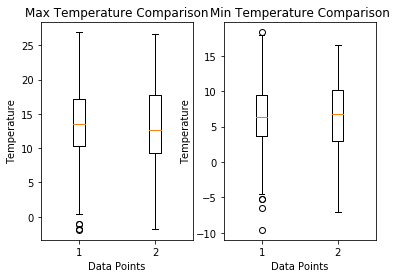

In [98]:
plt.subplot(1,2,2)
MinTempBoxPlot=[RandMinTemp, MinTemp]
plt.title("Min Temperature Comparison")
plt.boxplot(MinTempBoxPlot)
plt.xlabel('Data Points')
plt.ylabel('Temperature')
plt.show()

In [105]:
plt.subplot(1,2,1)
boxplot = RanWeatherData.boxplot(column=['Random Max Temp'])

In [106]:
plt.subplot(1,2,2)
boxplot = CorkAirportData.boxplot(column=['MaxTemp'])

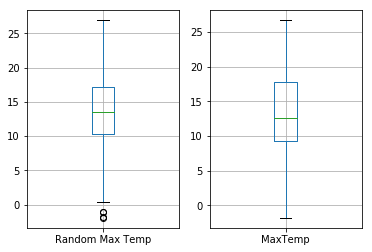

In [107]:
plt.show()